## Distribución Log-normal

La **distribución log-normal** es una distribución de probabilidad continua de una variable aleatoria cuyo **logaritmo está normalmente distribuido**. Es decir, si una variable $X$ tiene una distribución log-normal, entonces $\log(X)$ tiene una distribución normal.

---

### 📘 Definición formal

Una variable aleatoria $X$ sigue una **distribución log-normal** si:

$$
\log(X) \sim \mathcal{N}(\mu, \sigma^2)
$$

Esto implica que $X$ tiene la siguiente función de densidad de probabilidad (PDF):

$$
f(x) = \frac{1}{x \sigma \sqrt{2\pi}} \exp\left( -\frac{(\ln x - \mu)^2}{2\sigma^2} \right), \quad x > 0
$$

---

### 📌 Características

- **Soporte:** $x \in (0, \infty)$ — solo toma valores positivos.
- **Asimétrica:** Tiene una **cola derecha larga**, es decir, valores grandes son posibles pero poco probables.
- **Media:**

$$
\mathbb{E}[X] = e^{\mu + \frac{\sigma^2}{2}}
$$

- **Varianza:**

$$
\text{Var}(X) = \left(e^{\sigma^2} - 1\right) e^{2\mu + \sigma^2}
$$

---

### 🔍 ¿Cuándo se usa?

Se utiliza cuando los **valores crecen de manera multiplicativa** o cuando se tienen **procesos acumulativos positivos**, como:

- Precios de acciones
- Ingresos individuales
- Tiempo de vida de componentes electrónicos
- Distribución de tamaño de partículas

---

### 📊 Comparación con la normal

| Característica | Normal | Log-normal |
|----------------|--------|------------|
| Soporte        | $\mathbb{R}$ | $(0, \infty)$ |
| Forma          | Simétrica | Asimétrica (cola a la derecha) |
| Aplicaciones   | Errores, medidas centradas | Crecimiento, economía, biología |



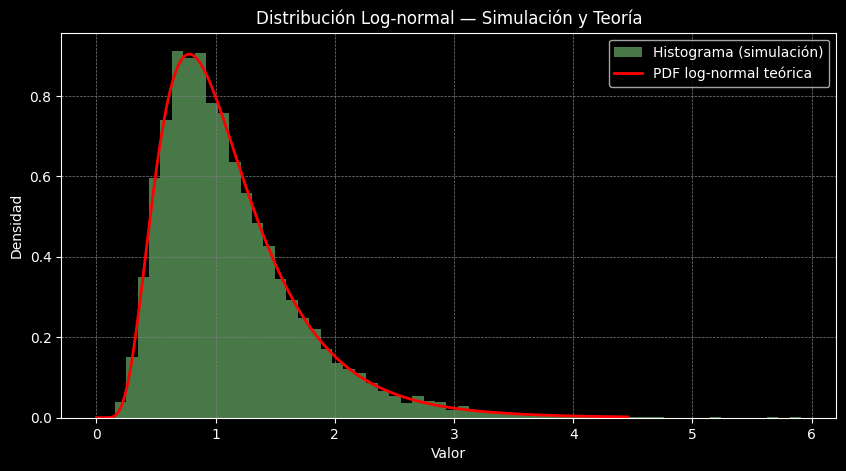

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm
plt.style.use('dark_background')

# Parámetros para la normal subyacente
mu = 0
sigma = 0.5
n = 10000

# Simulación: si Y ~ N(mu, sigma^2), entonces X = exp(Y) ~ LogNormal(mu, sigma)
lognormal_samples = np.random.lognormal(mean=mu, sigma=sigma, size=n)

# Eje x para la PDF teórica
x = np.linspace(0.001, np.percentile(lognormal_samples, 99.9), 1000)
pdf_lognormal = lognorm.pdf(x, s=sigma, scale=np.exp(mu))  # s = sigma, scale = exp(mu)

# Graficar
plt.figure(figsize=(10, 5))

# Histograma
plt.hist(lognormal_samples, bins=60, density=True, alpha=0.5, color='lightgreen', label='Histograma (simulación)')

# Curva teórica
plt.plot(x, pdf_lognormal, 'r-', lw=2, label='PDF log-normal teórica')

plt.title('Distribución Log-normal — Simulación y Teoría')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


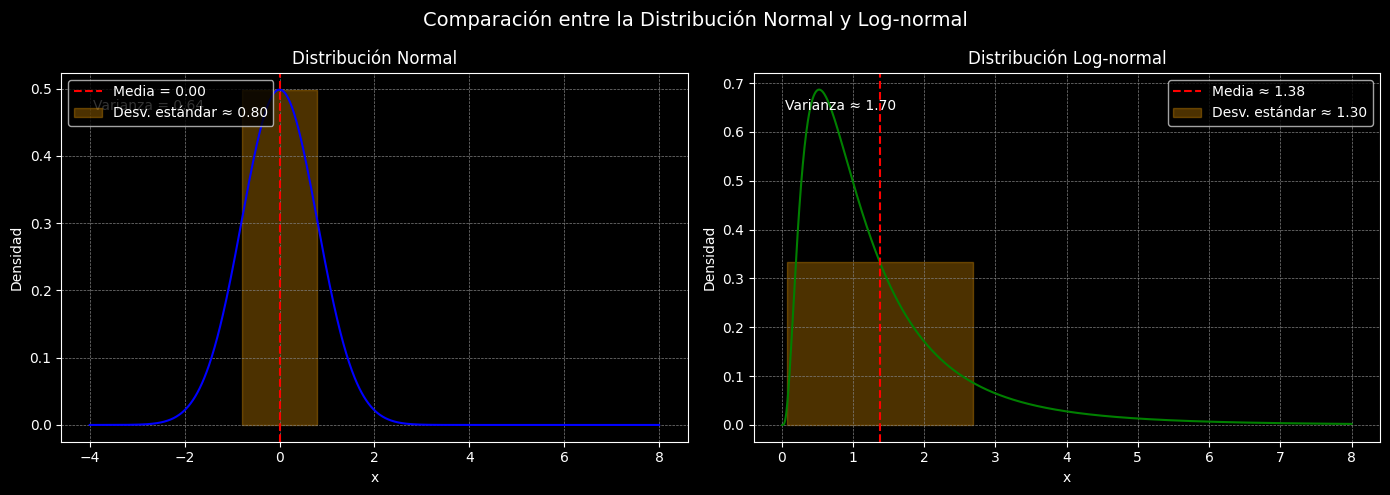

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Parámetros de la normal y log-normal
mu = 0
sigma = 0.8

# Generar datos
x = np.linspace(-4, 8, 1000)
normal_pdf = norm.pdf(x, mu, sigma)

# Para log-normal, scipy usa s=sigma, scale=exp(mu)
x_log = np.linspace(0.01, 8, 1000)
lognormal_pdf = lognorm.pdf(x_log, s=sigma, scale=np.exp(mu))

# Estadísticas
normal_mean = mu
normal_var = sigma**2
normal_std = sigma

lognormal_mean = np.exp(mu + sigma**2 / 2)
lognormal_var = (np.exp(sigma**2) - 1) * np.exp(2 * mu + sigma**2)
lognormal_std = np.sqrt(lognormal_var)

# Crear figuras
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución Normal
axes[0].plot(x, normal_pdf, color='blue')
axes[0].set_title("Distribución Normal")
axes[0].set_xlabel("x")
axes[0].set_ylabel("Densidad")
axes[0].grid(color='gray', linestyle='--', linewidth=0.5)
axes[0].axvline(normal_mean, color='red', linestyle='--', label=f'Media = {normal_mean:.2f}')
axes[0].fill_betweenx([0, norm.pdf(normal_mean, mu, sigma)], 
                      normal_mean - normal_std, normal_mean + normal_std, 
                      color='orange', alpha=0.3, label=f'Desv. estándar ≈ {normal_std:.2f}')
axes[0].legend(loc='upper left')
axes[0].text(0.05, 0.9, f'Varianza = {normal_var:.2f}', transform=axes[0].transAxes)

# Distribución Log-normal
axes[1].plot(x_log, lognormal_pdf, color='green')
axes[1].set_title("Distribución Log-normal")
axes[1].set_xlabel("x")
axes[1].set_ylabel("Densidad")
axes[1].grid(color='gray', linestyle='--', linewidth=0.5)
axes[1].axvline(lognormal_mean, color='red', linestyle='--', label=f'Media ≈ {lognormal_mean:.2f}')
axes[1].fill_betweenx([0, lognorm.pdf(lognormal_mean, s=sigma, scale=np.exp(mu))], 
                      lognormal_mean - lognormal_std, lognormal_mean + lognormal_std, 
                      color='orange', alpha=0.3, label=f'Desv. estándar ≈ {lognormal_std:.2f}')
axes[1].legend(loc='upper right')
axes[1].text(0.05, 0.9, f'Varianza ≈ {lognormal_var:.2f}', transform=axes[1].transAxes)

plt.suptitle("Comparación entre la Distribución Normal y Log-normal", fontsize=14)
plt.tight_layout()
plt.show()


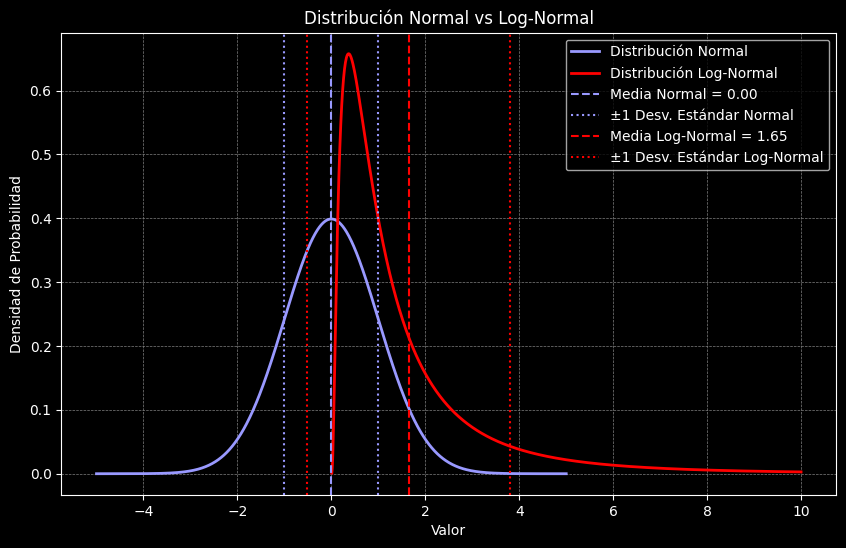

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parámetros para la distribución normal y log-normal
mu = 0  # media de la normal
sigma = 1  # desviación estándar de la normal

# Generar valores x
x = np.linspace(-5, 5, 1000)
log_x = np.linspace(0.01, 10, 1000)  # log-normal solo admite valores positivos

# Funciones de densidad de probabilidad
normal_pdf = stats.norm.pdf(x, mu, sigma)
log_normal_pdf = stats.lognorm.pdf(log_x, sigma, scale=np.exp(mu))

# Estadísticas de la distribución normal
normal_mean = mu
normal_variance = sigma**2
normal_std_dev = sigma

# Estadísticas de la distribución log-normal
log_normal_mean = np.exp(mu + sigma**2 / 2)
log_normal_variance = (np.exp(sigma**2) - 1) * np.exp(2 * mu + sigma**2)
log_normal_std_dev = np.sqrt(log_normal_variance)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar distribuciones
plt.plot(x, normal_pdf, label="Distribución Normal", color=(0.6,0.6,1.0), linewidth=2)
plt.plot(log_x, log_normal_pdf, label="Distribución Log-Normal", color='red', linewidth=2)

# Líneas de estadística normal
plt.axvline(normal_mean, color=(0.6,0.6,1.0), linestyle='--', label=f'Media Normal = {normal_mean:.2f}')
plt.axvline(normal_mean + normal_std_dev, color=(0.6,0.6,1.0), linestyle=':', label='±1 Desv. Estándar Normal')
plt.axvline(normal_mean - normal_std_dev, color=(0.6,0.6,1.0), linestyle=':')

# Líneas de estadística log-normal
plt.axvline(log_normal_mean, color='red', linestyle='--', label=f'Media Log-Normal = {log_normal_mean:.2f}')
plt.axvline(log_normal_mean + log_normal_std_dev, color='red', linestyle=':', label='±1 Desv. Estándar Log-Normal')
plt.axvline(log_normal_mean - log_normal_std_dev, color='red', linestyle=':')

# Añadir detalles
plt.title('Distribución Normal vs Log-Normal')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend(loc='upper right')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()
